# CIFAR-10データセットダウンロード

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170500096/170498071 [==============================] - 4s 0us/step


In [2]:
image_shape = (32, 32, 3)

# モデル準備

In [3]:
tf_keras_applications = [
    ['DenseNet121'      , 224, 224, tf.keras.applications.DenseNet121],
    # ['DenseNet169'      , 224, 224, tf.keras.applications.DenseNet169],
    # ['DenseNet201'      , 224, 224, tf.keras.applications.DenseNet201],
    ['EfficientNetB0'   , 224, 224, tf.keras.applications.EfficientNetB0],
    # ['EfficientNetB1'   , 240, 240, tf.keras.applications.EfficientNetB1],
    # ['EfficientNetB2'   , 260, 260, tf.keras.applications.EfficientNetB2],
    # ['EfficientNetB3'   , 300, 300, tf.keras.applications.EfficientNetB3],
    # ['EfficientNetB4'   , 380, 380, tf.keras.applications.EfficientNetB4],
    # ['EfficientNetB5'   , 456, 456, tf.keras.applications.EfficientNetB5],
    # ['EfficientNetB6'   , 528, 528, tf.keras.applications.EfficientNetB6],
    # ['EfficientNetB7'   , 600, 600, tf.keras.applications.EfficientNetB7],
    # ['InceptionResNetV2', 299, 299, tf.keras.applications.InceptionResNetV2],
    # ['InceptionV3'      , 299, 299, tf.keras.applications.InceptionV3],
    ['MobileNet'        , 224, 224, tf.keras.applications.MobileNet],
    ['MobileNetV2'      , 224, 224, tf.keras.applications.MobileNetV2],
    # ['MobileNetV3Large' , 224, 224, tf.keras.applications.MobileNetV3Large],
    # ['MobileNetV3Small' , 224, 224, tf.keras.applications.MobileNetV3Small],
    # ['NASNetLarge'      , 331, 331, tf.keras.applications.NASNetLarge],
    ['NASNetMobile'     , 224, 224, tf.keras.applications.NASNetMobile],
    # ['ResNet101'        , 224, 224, tf.keras.applications.ResNet101],
    # ['ResNet101V2'      , 224, 224, tf.keras.applications.ResNet101V2],
    # ['ResNet152'        , 224, 224, tf.keras.applications.ResNet152],
    # ['ResNet152V2'      , 224, 224, tf.keras.applications.ResNet152V2],
    # ['ResNet50'         , 224, 224, tf.keras.applications.ResNet50],
    ['ResNet50V2'       , 224, 224, tf.keras.applications.ResNet50V2],
    # ['VGG16'            , 224, 224, tf.keras.applications.VGG16],
    # ['VGG19'            , 224, 224, tf.keras.applications.VGG19],
    # ['Xception'         , 299, 299, tf.keras.applications.Xception],
]

In [4]:
base_models = []

for tf_keras_application in tf_keras_applications:
    model_input_w = tf_keras_application[1]
    model_input_h = tf_keras_application[2]

    model_input = tf.keras.Sequential([
        tf.keras.Input(shape=image_shape),
        tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (model_input_h, model_input_w)), name='resize'),
    ])

    base_models.append([
        tf_keras_application[3](
            input_tensor=model_input.output,
            include_top=False, 
            weights='imagenet', 
            input_shape=(model_input_h, model_input_w, 3),
        ), 
        tf_keras_application[0]
    ])

94674944/94668760 [==============================] - 1s 0us/step


# 訓練

In [5]:
results = []

for base_model in base_models:
    print(base_model[1])

    # 重み固定解除
    base_model[0].trainable = True

    # 出力層追加
    model = tf.keras.models.Sequential([
        base_model[0],
        tf.keras.layers.Flatten(),
        # tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # モデルコンパイル
    model.compile(
        optimizer='sgd',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # 訓練
    history = model.fit(
        x=x_train, 
        y=y_train,
        validation_data=(x_test, y_test),
        epochs=25,
    )

    # パラメータ数取得
    params = model.count_params()

    # モデル評価
    evaluate = model.evaluate(x_test, y_test)

    # 結果格納
    results.append([base_model[1], model, params, history, evaluate])

DenseNet121
Epoch 1/25
1563/1563 [==============================] - 314s 186ms/step - loss: 19.2968 - accuracy: 0.1850 - val_loss: 11.5179 - val_accuracy: 0.3666
Epoch 2/25
1563/1563 [==============================] - 288s 184ms/step - loss: 1.6863 - accuracy: 0.4133 - val_loss: 24.4306 - val_accuracy: 0.4685
Epoch 3/25
1563/1563 [==============================] - 288s 184ms/step - loss: 1.4139 - accuracy: 0.4963 - val_loss: 7.7488 - val_accuracy: 0.5153
Epoch 4/25
1563/1563 [==============================] - 288s 184ms/step - loss: 1.2724 - accuracy: 0.5499 - val_loss: 8.9773 - val_accuracy: 0.5544
Epoch 5/25
1563/1563 [==============================] - 288s 184ms/step - loss: 1.1706 - accuracy: 0.5865 - val_loss: 7.0433 - val_accuracy: 0.5426
Epoch 6/25
1563/1563 [==============================] - 288s 184ms/step - loss: 1.0812 - accuracy: 0.6181 - val_loss: 12.4793 - val_accuracy: 0.6032
Epoch 7/25
1563/1563 [==============================] - 288s 184ms/step - loss: 1.0036 - accurac

In [6]:
for result in results:
    print(result)

['DenseNet121', <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f59ec1daa50>, 7539274, <tensorflow.python.keras.callbacks.History object at 0x7f59ddd5d590>, [32.902645111083984, 0.742900013923645]]
['EfficientNetB0', <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f5964953d50>, 4676781, <tensorflow.python.keras.callbacks.History object at 0x7f59da598e50>, [2.5751030445098877, 0.5273000001907349]]
['MobileNet', <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f596434b090>, 3730634, <tensorflow.python.keras.callbacks.History object at 0x7f596429e150>, [0.3272261619567871, 0.9387999773025513]]
['MobileNetV2', <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f5774d75b50>, 2885194, <tensorflow.python.keras.callbacks.History object at 0x7f5774b8e410>, [0.39546045660972595, 0.934499979019165]]
['NASNetMobile', <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f5773c33cd0>, 4787166, <tensorflow.python.ke

# 学習結果プロット

In [7]:
import matplotlib.pyplot as plt

def plot_history(history, title=''):
    plt.figure(figsize=(19, 6))

    # 精度の履歴をプロット
    plt.subplot(1, 2, 1)
    plt.title(title + ' accuracy')
    plt.plot(history.history['accuracy'],"-",label="accuracy")
    plt.plot(history.history['val_accuracy'],"-",label="val_accuracy")
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
 
    # 損失の履歴をプロット
    plt.subplot(1, 2, 2)
    plt.title(title + ' loss')
    plt.plot(history.history['loss'],"-",label="loss",)
    plt.plot(history.history['val_loss'],"-",label="val_loss")
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()

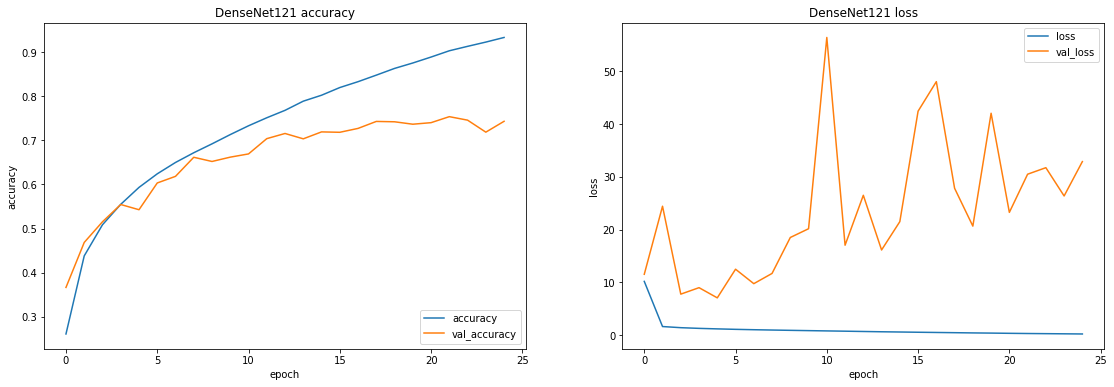

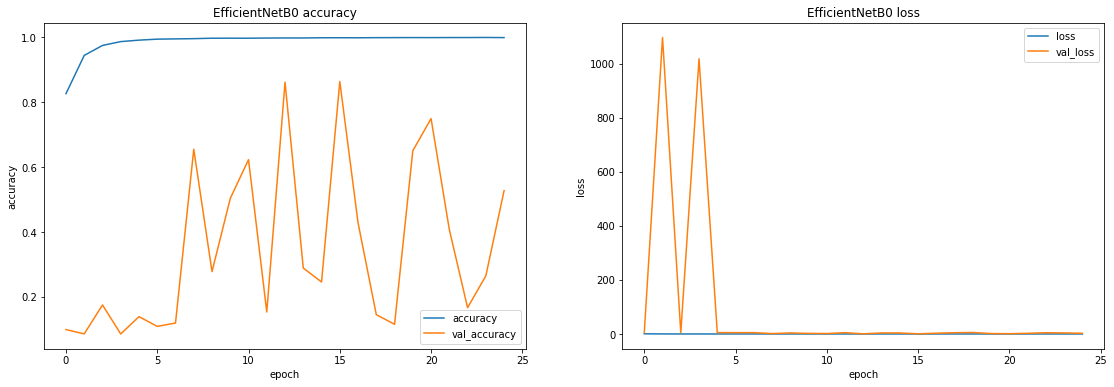

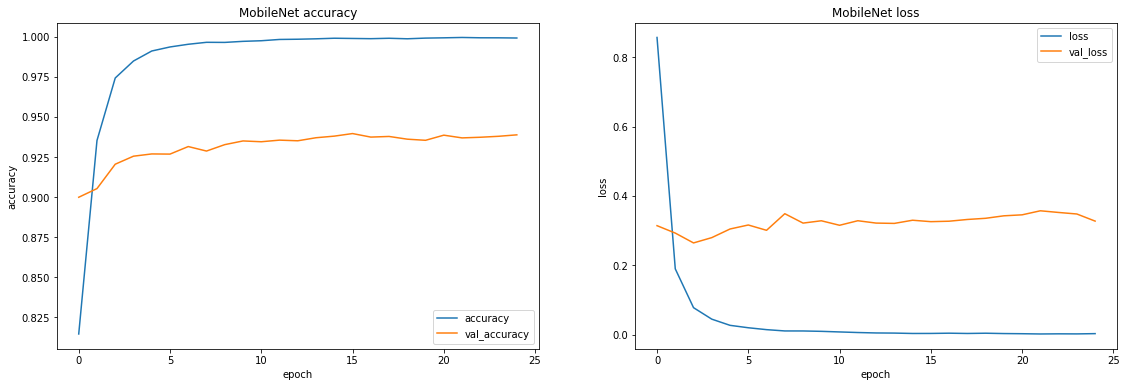

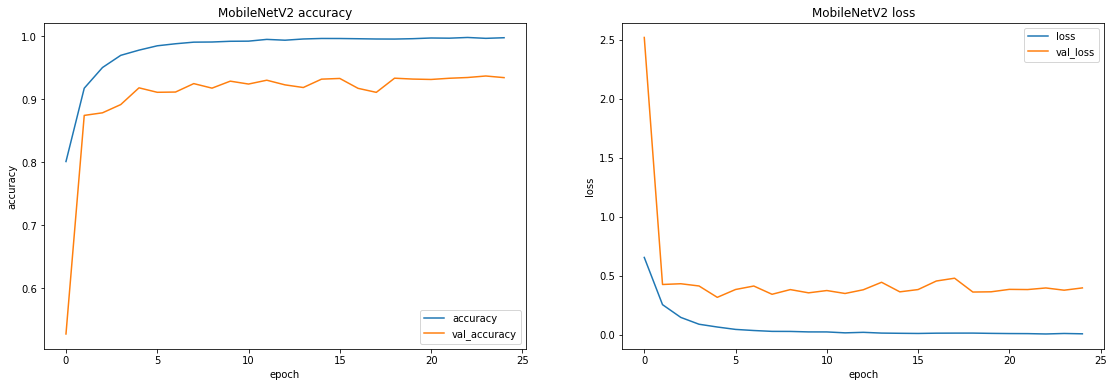

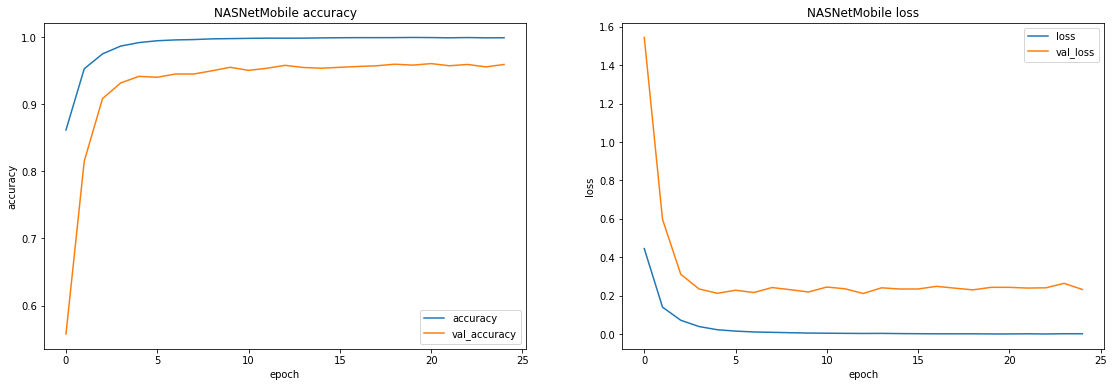

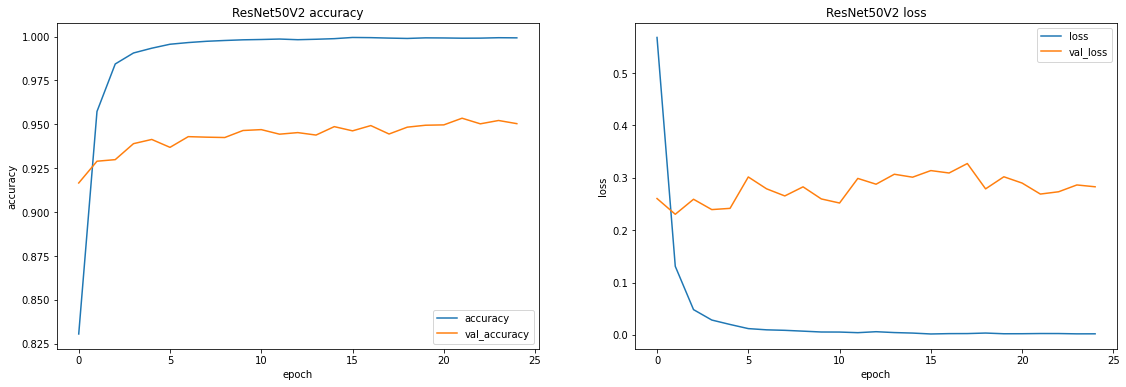

In [8]:
for result in results:
    plot_history(result[3], result[0])